In [89]:
import pdftotext
import nltk
import pandas as pd
import string
from pathlib import Path

In [110]:
# text tokenization
nltk.download('punkt')

# stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/rowens/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rowens/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## load pdf

In [29]:
with open("dummy_test.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)
#type(pdf)

## page count

In [ ]:
print(len(pdf))

## Iterate over all the pages

In [ ]:
for page in pdf:
    print(page)

## print specific page

In [ ]:
print(pdf[0])

## subscript within page

In [ ]:
pdf[0][0:20]

***

## tokenize text

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/rowens/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
tokens = nltk.word_tokenize(''.join(pdf))

In [59]:
# tokens can be indexed
tokens[0]

'Analysis'

## find word in token list using nltk

In [60]:
word = 'experiment'
nltk.Text(tokens).count(word)

1

## find five words in pdf, place word & count in list

In [61]:
# text parsing issue
# not all tokens are consistent in case
tokens[23].lower(), tokens[23]

('faculty', 'Faculty')

In [62]:
# convert all tokens to lowercase
low_tokens = [token.lower() for token in tokens]

In [63]:
# no more conflict of case
low_tokens[23].lower(), low_tokens[23]

('faculty', 'faculty')

In [64]:
# initialize lists
words = ["accuracy", "findings", "experimental", "estimation", "doctor"]
word_summary = []
low_word_summary = []

In [65]:
# check every word in the 5 to search against the tokens
# insert word/count in summary
for word in words:
    word_summary.append([word, nltk.Text(tokens).count(word)])
word_summary

[['accuracy', 7],
 ['findings', 3],
 ['experimental', 5],
 ['estimation', 72],
 ['doctor', 0]]

In [66]:
# same as above but utilizing lowercase tokens
# results are different but important
# ex. 'experimental' is 5 without lowercase and 7 with all lowercase
for word in words:
    low_word_summary.append([word, nltk.Text(low_tokens).count(word)])
low_word_summary

[['accuracy', 7],
 ['findings', 3],
 ['experimental', 7],
 ['estimation', 73],
 ['doctor', 0]]

## create pandas dataframe for visualization

In [67]:
df = pd.DataFrame(word_summary, columns = ["word", "count"])
df

,word,count
0,accuracy,7
1,findings,3
2,experimental,5
3,estimation,72
4,doctor,0


In [68]:
df_low = pd.DataFrame(low_word_summary, columns = ["word", "count"])
# demo start
#df_low = df_low.set_index('word')
# demo end
df_low

,word,count
0,accuracy,7
1,findings,3
2,experimental,7
3,estimation,73
4,doctor,0


<AxesSubplot:xlabel='word'>

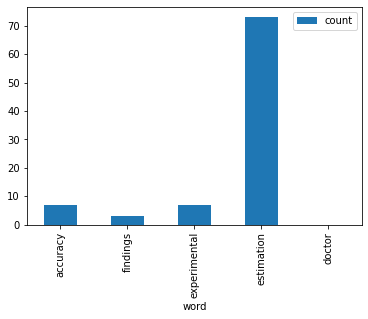

In [69]:
df_low.plot.bar(x='word', y='count')

***
***
## Directory of PDF

In [25]:
pdf_folder = Path('Suggested Readings/').rglob('*.pdf')
files = [x for x in pdf_folder]
files

[PosixPath('Suggested Readings/MedvedevaEtAl2019.pdf'),
 PosixPath('Suggested Readings/KDD97-003.pdf'),
 PosixPath('Suggested Readings/P99-1001.pdf'),
 PosixPath('Suggested Readings/10.1007978-3-319-67056-018.pdf')]

In [40]:
words = ["accuracy", "findings", "experimental", "estimation", "doctor"]
word_summary = []
for word in words:
    word_summary.append([word,0])
word_summary

[['accuracy', 0],
 ['findings', 0],
 ['experimental', 0],
 ['estimation', 0],
 ['doctor', 0]]

In [41]:
word_summary[0][0], word_summary[1][0]

('accuracy', 'findings')

In [55]:
words[0], word_summary[0][0], words[word], nltk.Text(tokens).count(words[word])

('accuracy', 'accuracy', 'accuracy', int)

In [131]:
tokens = []
stopWords = set(stopwords.words('english'))

# iterate every file in directory
for file in files:
    # open file
    with open(file, 'rb') as f:
        # conversion with pdftotext
        multi_pdf = pdftotext.PDF(f)
        # place current pdf text into list of tokens
        tokens += nltk.word_tokenize(''.join(multi_pdf))
        # update wordcount for tokens in current file
        
        # check this in spyder, duplicating words? missing words?
        tokens_removed = [word for word in tokens
                          if word not in stopWords
                          and word not in string.punctuation]
        for word in range(len(test_summary)):
            word_summary[word][1] += nltk.Text(tokens).count(words[word])

In [132]:
len(tokens)

40095

In [134]:
word_summary

[['accuracy', 187],
 ['findings', 5],
 ['experimental', 21],
 ['estimation', 72],
 ['doctor', 0]]

In [135]:
df_multi = pd.DataFrame(word_summary, columns = ["word", "count"])
df_multi

,word,count
0,accuracy,187
1,findings,5
2,experimental,21
3,estimation,72
4,doctor,0


<AxesSubplot:xlabel='word'>

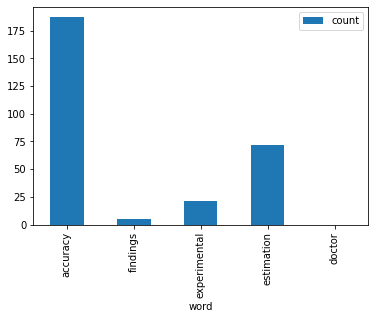

In [136]:
df_multi.plot.bar(x='word', y='count')

---
---
# TO-DO
### immediate
* look at the TOP 5 of N many words
* play with stopwords
 * remove from tokens list

### long-term
* Look into API for digital commons
* Adjust visualizations

In [83]:
len(test_tokens)

40095

In [109]:
stopWords = set(stopwords.words('english'))

In [116]:
tokens_removed = [word for word in test_tokens
                  if word not in stopWords
                  and word not in string.punctuation]
len(tokens_removed)

22734

In [137]:
fd = nltk.FreqDist(tokens)
print(fd.most_common(5))

[(',', 2082), ('the', 1876), ('.', 1853), ('of', 1247), ('and', 719)]


In [98]:
tokens_removed = []